#Zomato Data Analysis Project


##Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Create Dataframe


In [ ]:
df = pd.read_csv("/content/Zomato data .csv")
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [ ]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


##Convert the datatype of column "rate"


In [ ]:
def handlerate (value):
  value = str(value).split("/")
  value=value[0]
  return float(value)
df['rate']=df['rate'].apply (handlerate)
print (df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


##Type of resturant

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of resturant')

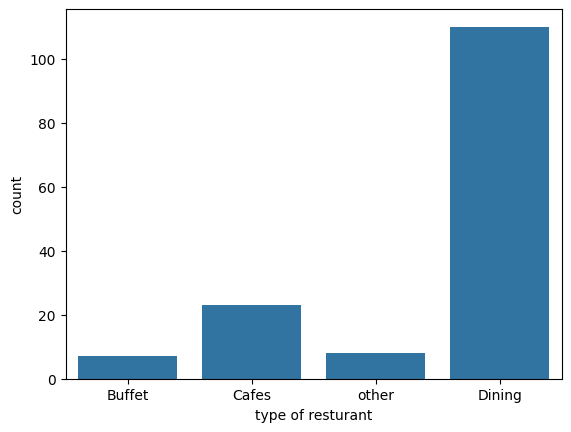

In [ ]:
sns.countplot(x= df["listed_in(type)"])
plt.xlabel('type of resturant')


##so majority of customers order from dining

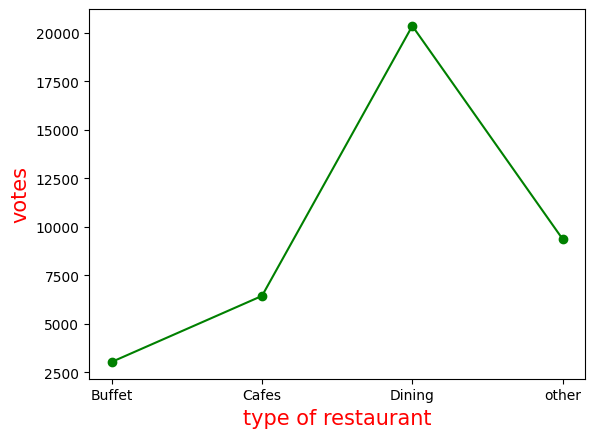

In [ ]:
group_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': group_data})  # Fix: pd.DataFrame, not pd.df

plt.plot(result, c="green", marker="o")       # Fix: marker, not markar
plt.xlabel("type of restaurant", color="red", fontsize=15)
plt.ylabel("votes", color="red", fontsize=15)
plt.show()


##dining resturant has received maximum votes.

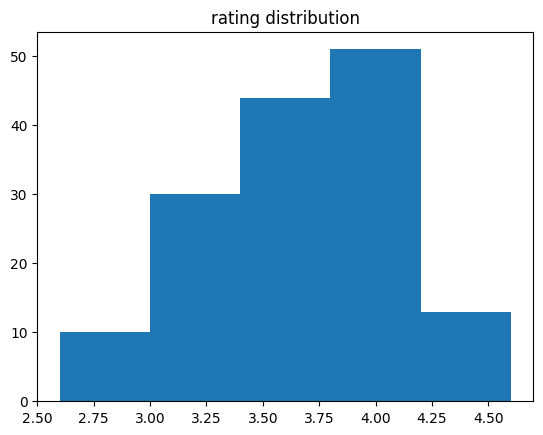

In [ ]:
plt.hist(df['rate'],bins = 5)
plt.title("rating distribution")
plt.show()

##the majority resturant received ratings from 3.5 to 4

##Average order spending by couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

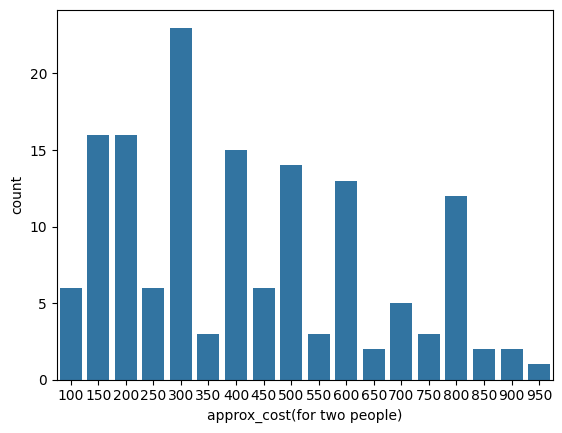

In [ ]:
couple_data= df['approx_cost(for two people)']
sns.countplot(x=couple_data)

##so the majority of couples prefer resturants with an approximate cost of 300rs

##which mode received maximum rating.

<Axes: xlabel='online_order', ylabel='rate'>

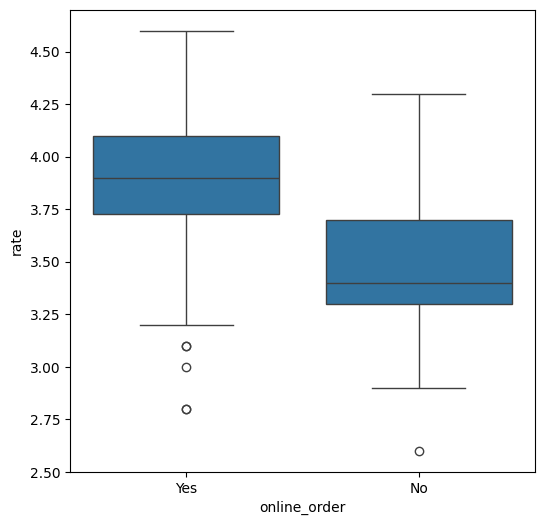

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x= 'online_order',y='rate',data = df)

##offline order received lower rating comparison to online rating

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


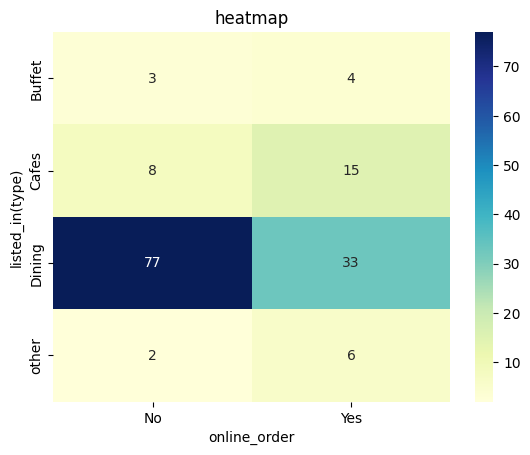

In [ ]:
pivot_table = df.pivot_table(index= "listed_in(type)",columns="online_order",aggfunc="size",fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt="d")
plt.title("heatmap")
plt.xlabel="online_order"
plt.ylabel="listed_in(type)"
plt.show()

##dining resturants primarily accept offline orders whereas caffes primarily received online order.